# Assignment 2

## 1. Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Load dataset

In [2]:
DF = pd.read_csv("Churn_Modelling.csv") 
DF

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 3. Visualizations

### 3.1. Univariate Analysis

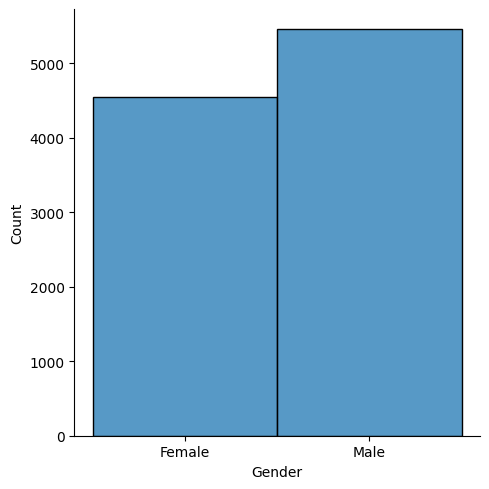

In [3]:
sns.displot(DF.Gender)

### 3.2. Bi-Variate Analysis

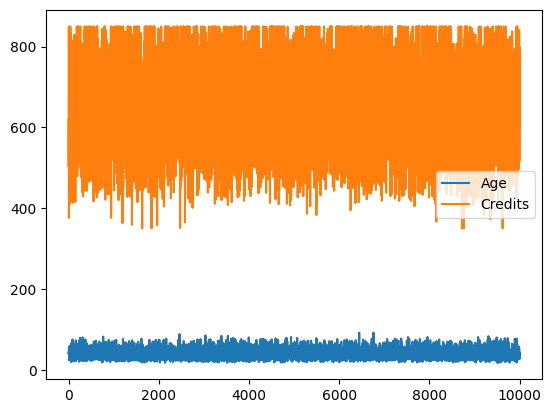

In [4]:
DF.Age.plot()
DF.CreditScore.plot()
plt.legend(['Age','Credits'])

### 3.3. Multi-Variate Analysis

<AxesSubplot: >

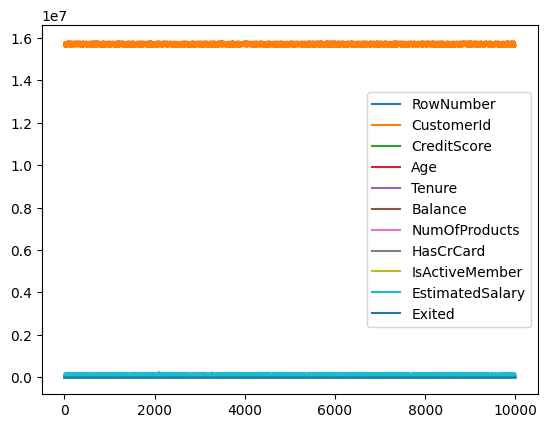

In [5]:
DF.plot()

## 4. Descriptive Statistics

In [6]:
DF.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handle the missing values

In [7]:
pd.isnull(DF['Age'])

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Age, Length: 10000, dtype: bool

## 6. Find the outliers and replace the outliers

### 6.1. Find the outliers

<AxesSubplot: >

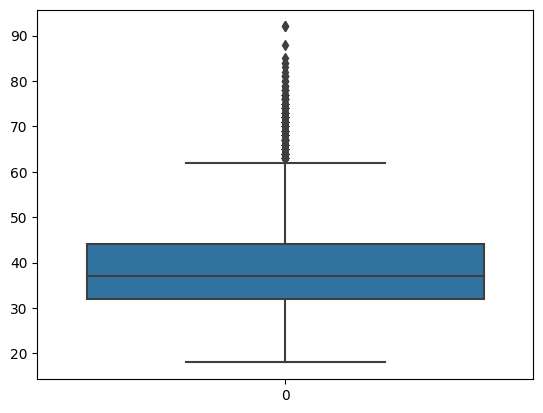

In [8]:
sns.boxplot(DF['Age'])

In [9]:
DF['Age'] = np.where(DF['Age']>50,40,DF['Age'])
DF['Age']

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

### 6.2. Replace the outliers

<AxesSubplot: >

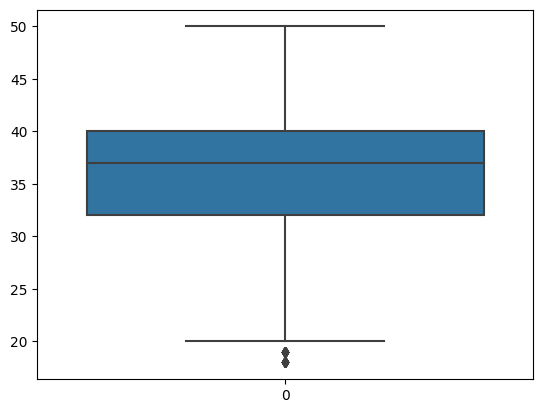

In [10]:
sns.boxplot(DF['Age'])

In [11]:
DF['Age'] = np.where(DF['Age']<20,35,DF['Age'])
DF['Age']

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

## 7. Check for Categorical columns and perform encoding

In [12]:
pd.get_dummies(DF,columns=['Age','Gender']).head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_50,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,France,2,0.00,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,2,15647311,Hill,608,Spain,1,83807.86,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,Onio,502,France,8,159660.80,3,1,0,...,0,0,0,0,0,0,0,0,1,0
3,4,15701354,Boni,699,France,1,0.00,2,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,15737888,Mitchell,850,Spain,2,125510.82,1,1,1,...,1,0,0,0,0,0,0,0,1,0


## 8. Split the data into Dependent and Independent variables

### 8.1. Independent variable

In [13]:
X = DF.iloc[:, :-1].values
X

array([[1, 15634602, 'Hargrave', ..., 1, 1, 101348.88],
       [2, 15647311, 'Hill', ..., 0, 1, 112542.58],
       [3, 15619304, 'Onio', ..., 1, 0, 113931.57],
       ...,
       [9998, 15584532, 'Liu', ..., 0, 1, 42085.58],
       [9999, 15682355, 'Sabbatini', ..., 1, 0, 92888.52],
       [10000, 15628319, 'Walker', ..., 1, 0, 38190.78]], dtype=object)

### 8.2. Dependent variable

In [14]:
Y = DF.iloc[:, -1].values
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## 9. Scale the Independent variables

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
DF[["CustomerId"]] = scaler.fit_transform(DF[["CustomerId"]])
DF[["CustomerId"]]

,CustomerId
0,0.275616
1,0.326454
2,0.214421
3,0.542636
4,0.688778
...,...
9995,0.162119
9996,0.016765
9997,0.075327
9998,0.466637


## 10. Split the data into Training and testing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)
# 100% data ==>  80% - Traning and 20% - Testing

### 10.1. Training data

In [19]:
print(X_train.shape), print(Y_train.shape)

(8000, 13)
(8000,)


(None, None)

### 10.2. Testing data

In [20]:
print(X_test.shape), print(Y_test.shape)

(2000, 13)
(2000,)


(None, None)